# Financial Analytics

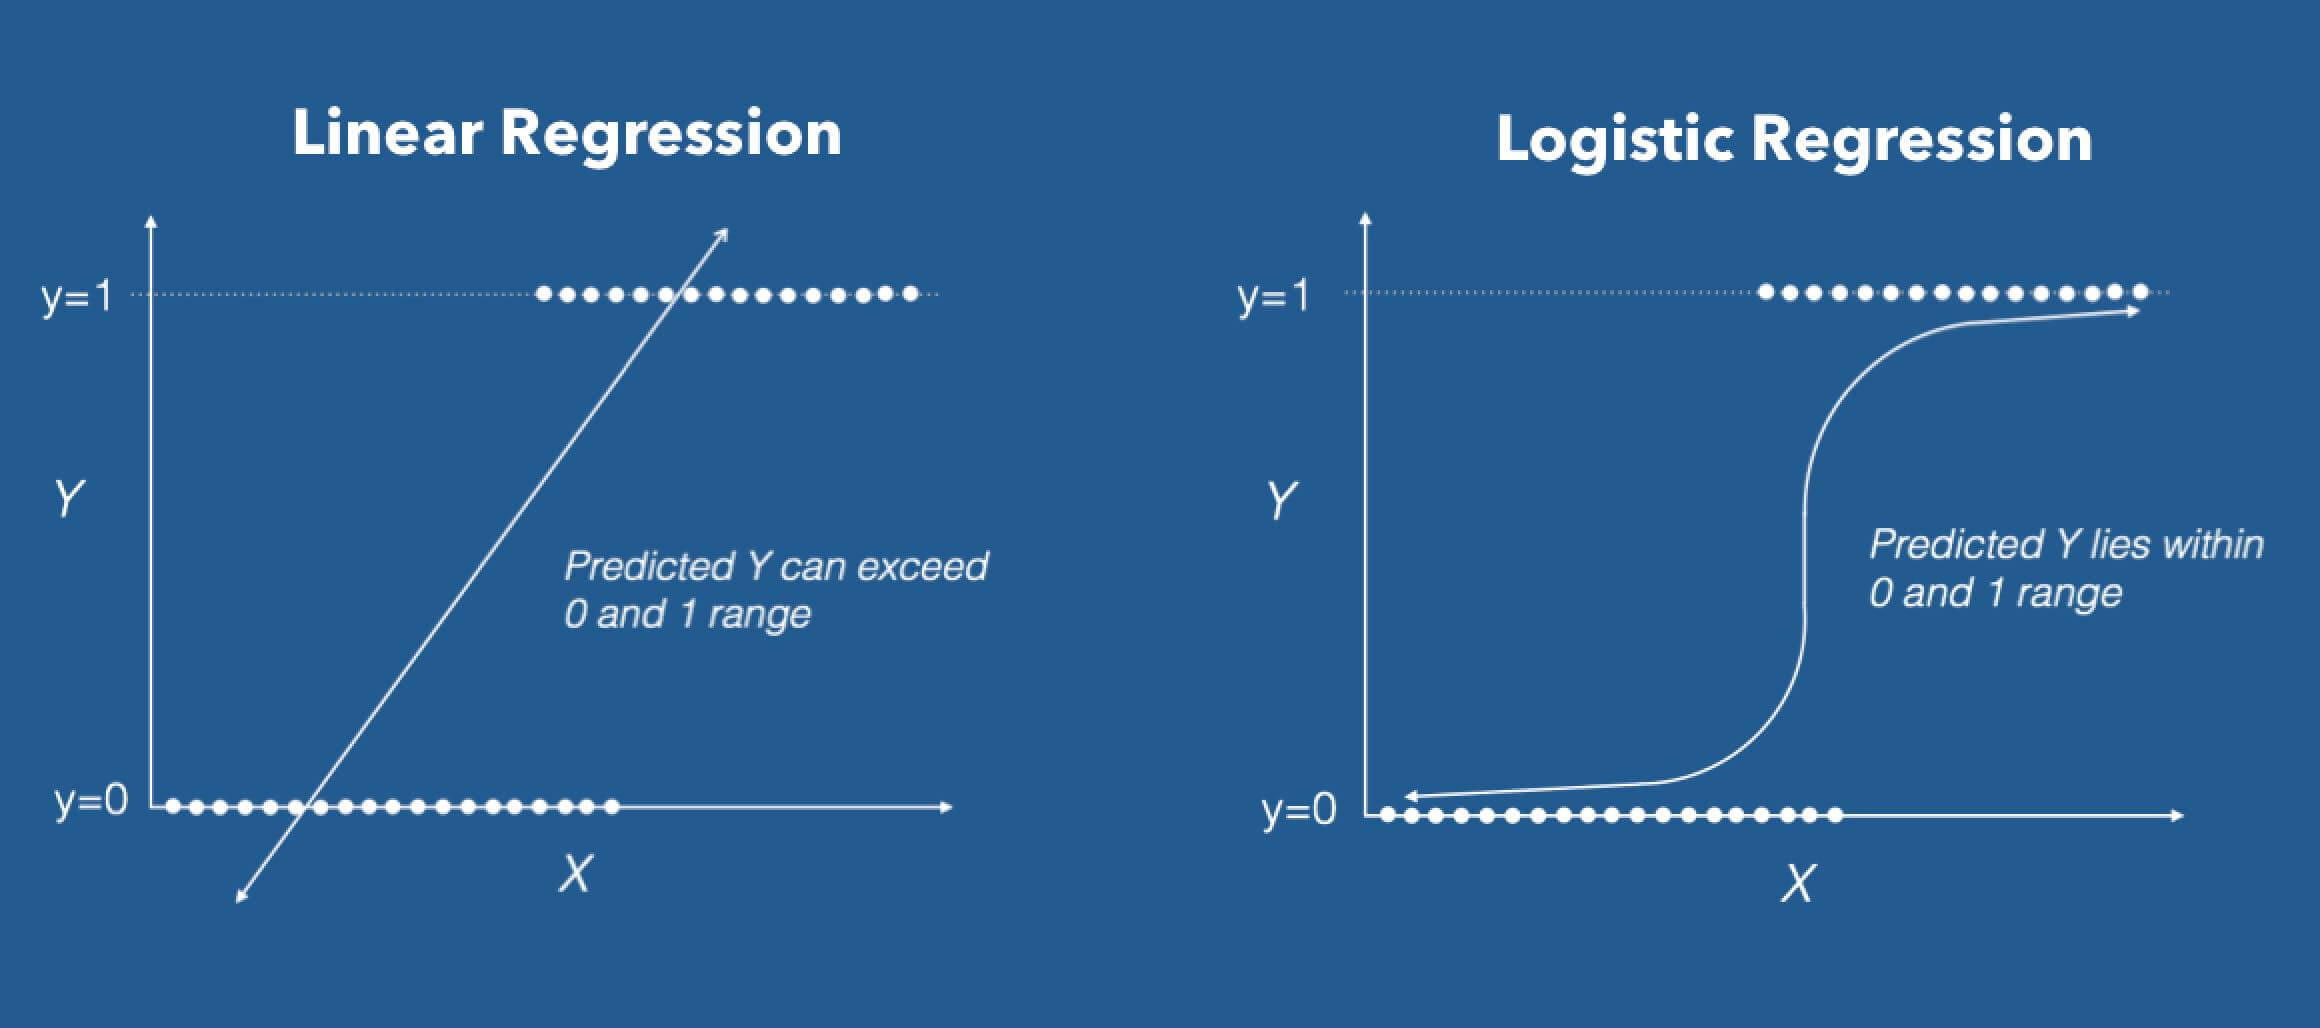

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings 
warnings.filterwarnings('ignore')

In [52]:
default = pd.read_csv("Default.csv")
default

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879
...,...,...,...,...,...
9995,9996,No,No,711.555020,52992.378914
9996,9997,No,No,757.962918,19660.721768
9997,9998,No,No,845.411989,58636.156984
9998,9999,No,No,1569.009053,36669.112365


In [53]:
default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [54]:
default.shape

(10000, 5)

In [55]:
default.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


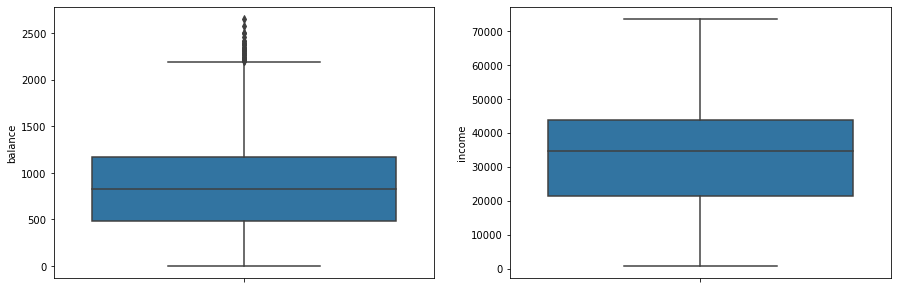

In [56]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y = default['balance'])

plt.subplot(1, 2, 2)
sns.boxplot(y = default['income'])

plt.show()

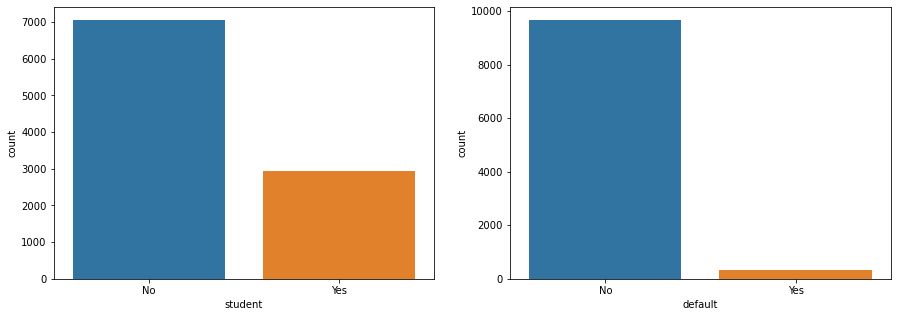

In [57]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sns.countplot(default['student'])

plt.subplot(1, 2, 2)
sns.countplot(default['default'])

plt.show()

In [58]:
default["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [59]:
default['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [60]:
default['student'].value_counts(normalize = True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [61]:
default['default'].value_counts(normalize = True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

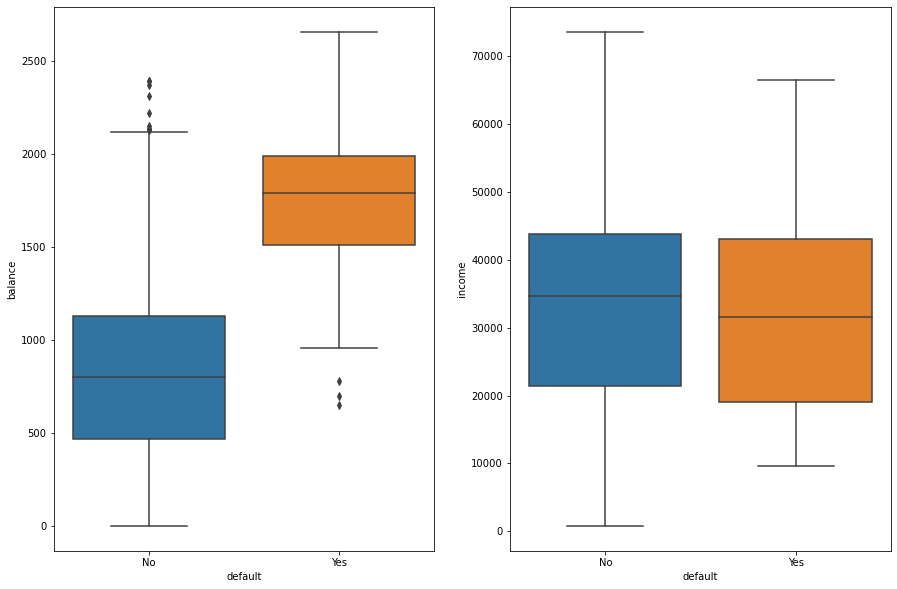

In [62]:
plt.figure(figsize = (15, 10))

plt.subplot(1, 2, 1)
sns.boxplot(default['default'], default['balance'])

plt.subplot(1, 2, 2)
sns.boxplot(default['default'], default['income'])

plt.show()

In [63]:
pd.crosstab(default['student'], default['default'], normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


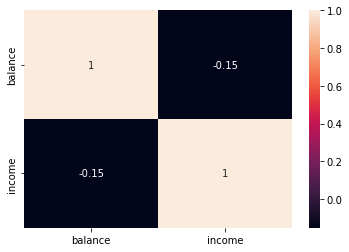

In [64]:
sns.heatmap(default[['balance', 'income']].corr(), annot = True)
plt.show()

In [65]:
default.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [66]:
Q1, Q3 = default['balance'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5 * (IQR)
UL = Q1 + 1.5 * (IQR)

In [67]:
LL

-545.1348170774601

In [68]:
UL

1508.5970271864967

In [69]:
dff = default[default['balance'] > UL]

In [70]:
dff

,Unnamed: 0,default,student,balance,income
44,45,No,Yes,1690.234410,19052.572225
57,58,No,No,1536.594601,48766.907458
73,74,No,Yes,1578.064099,19886.493952
105,106,No,Yes,1722.355846,19311.422941
126,127,No,Yes,1557.344637,18404.594189
...,...,...,...,...,...
9951,9952,Yes,No,1515.606239,48688.512086
9957,9958,No,No,1765.990895,47642.422120
9962,9963,No,Yes,1635.175122,13518.930622
9978,9979,Yes,No,2202.462395,47287.257108


In [71]:
dff['default'].count()

879

In [72]:
dff['default'].value_counts(normalize = True)

No     0.714448
Yes    0.285552
Name: default, dtype: float64

In [74]:
dff['default'].value_counts()

No     628
Yes    251
Name: default, dtype: int64

In [75]:
default['balance'] = np.where(default['balance'] > UL, UL, default['balance'])

In [76]:
default['balance']

0        729.526495
1        817.180407
2       1073.549164
3        529.250605
4        785.655883
           ...     
9995     711.555020
9996     757.962918
9997     845.411989
9998    1508.597027
9999     200.922183
Name: balance, Length: 10000, dtype: float64

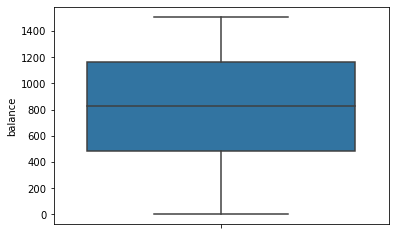

In [77]:
sns.boxplot(y = default['balance'])
plt.show()

In [78]:
default = pd.get_dummies(default, drop_first = True)

In [79]:
default.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


In [81]:
default.columns = ['Unnamed: 0', 'balance', 'income', 'default', 'student']

In [82]:
default.head()

,Unnamed: 0,balance,income,default,student
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


# logistic regression algorithm apply

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x = default.drop('default', axis = 1)
y = default['default']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21, stratify = y)

In [89]:
print(x_train.shape)
print(x_test.shape)

(7000, 4)
(3000, 4)


In [98]:
print(y_train.value_counts(normalize = True).round(2))
print('\n-------\n')
print(y_test.value_counts(normalize = True). round(2))

0    0.97
1    0.03
Name: default, dtype: float64

-------

0    0.97
1    0.03
Name: default, dtype: float64


In [114]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33,sampling_strategy = 0.75)
x_res, y_res = sm.fit_sample(x_train, y_train)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
lr = LogisticRegression

In [117]:
lr.fit(x_res, y_res)

NameError: name 'x_res' is not defined

In [118]:
y_pred = lr.predict(x_test)

TypeError: predict() missing 1 required positional argument: 'X'

In [119]:
from sklearn.metrics import confusion_matrix, classification_report

In [120]:
confusion_matrix(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [121]:
(2589 + 75) / (2589 + 75 + 311 + 25)

0.888